# 8. 머신러닝 프로세스5: 모델평가

## 8-1. 데이터 불러오기 및 데이터셋 분할

In [2]:
# 분석 데이터 불러오기
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data=pd.read_csv('Fvote.csv', encoding='utf-8')

In [3]:
# 특성치와 레이블 데이터셋 구분
X=data[data.columns[1:13]]
y=data[['vote']]

In [4]:
# 훈련 데이터, 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42 )

## 8-2. Grid Search

In [5]:
# 그리드서치를 위한 라이브러리 및 탐색 하이퍼파라미터 설정
from sklearn.model_selection import GridSearchCV
param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [6]:
# LogisticRegression 알고리즘 적용
from sklearn.linear_model import LogisticRegression

In [7]:
# 그리드서치를 로지스틱 모델에 적용하여 훈련데이터 학습
# 교차검증(cv) 5 설정, 훈련데이터 정확도 결과 제시하기(True)
grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [8]:
# 정확도가 가장 높은 하이퍼파라미터(C) 및 정확도 제시
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Parameter: {'C': 10}
Best Cross-validity Score: 0.727


In [9]:
# 테스트 데이터에 적용(C=10), 정확도 결과
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.679


In [10]:
# 그리드서치 하이퍼파라미터별 상세 결과값
result_grid= pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005130,0.002453,0.001172,0.000391,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.004107,0.001146,0.000974,0.000005,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.005180,0.000618,0.001179,0.000396,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.738095,0.746032,0.738095,0.740157,0.716535,0.735783,0.010053
3,0.007418,0.000480,0.000976,0.000002,1,{'C': 1},0.71875,0.68750,0.78125,0.580645,...,0.714919,0.079466,4,0.738095,0.793651,0.730159,0.763780,0.724409,0.750019,0.025634
4,0.009482,0.001264,0.001361,0.000469,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.011611,0.001705,0.001569,0.000475,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


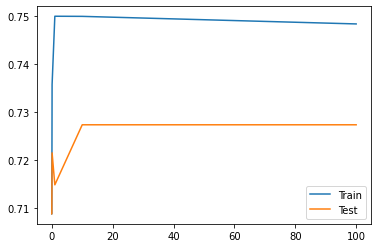

In [11]:
# 하이퍼파리미터(C)값에 따른 훈련데이터와 테스트데이터의 정확도(accuracy) 그래프
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

## 8-3. Random Search

In [12]:
# 랜덤서치를 위한 라이브러리 및 탐색 하이퍼파라미터 설정
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={'C': randint(low=0.001, high=100)}

In [13]:
# LogisticRegression 알고리즘 적용
from sklearn.linear_model import LogisticRegression

In [14]:
# 랜덤서치를 로지스틱 모델에 적용하여 훈련데이터 학습
# 교차검증(cv) 5 설정, 훈련데이터 정확도 결과 제시하기(True)
random_search=RandomizedSearchCV(LogisticRegression(), 
                                 param_distributions=param_distribs, cv=5,
                                 # n_iter=100, 랜덤횟수 디폴트=10
                                return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002370B8E6160>},
                   return_train_score=True)

In [15]:
# 정확도가 가장 높은 하이퍼파라미터(C) 및 정확도 제시
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Parameter: {'C': 93}
Best Cross-validity Score: 0.727


In [16]:
# 테스트 데이터에 최적 텀색 하이퍼 파라미터 적용 정확도 결과
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.679


In [17]:
# 랜덤서치 하이퍼파라미터별 상세 결과값
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012877,0.001894,0.001172,0.000393,93,{'C': 93},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
1,0.010920,0.000727,0.001182,0.000401,56,{'C': 56},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
2,0.011127,0.000781,0.001183,0.000385,97,{'C': 97},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
3,0.010832,0.001250,0.001361,0.000475,27,{'C': 27},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
4,0.011819,0.000745,0.001276,0.000403,75,{'C': 75},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
5,0.011822,0.000629,0.001175,0.000374,76,{'C': 76},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
6,0.011751,0.001228,0.001475,0.000439,45,{'C': 45},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
7,0.009065,0.000727,0.001497,0.000432,3,{'C': 3},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
8,0.010015,0.001181,0.001279,0.000393,9,{'C': 9},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
9,0.010038,0.001588,0.001361,0.000484,5,{'C': 5},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.777778,0.730159,0.779528,0.724409,0.751581,0.023218


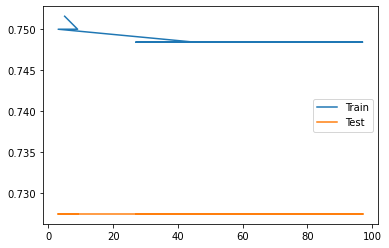

In [18]:
# 하이퍼파리미터(C)값에 따른 훈련데이터와 테스트데이터의 정확도(accuracy) 그래프
import matplotlib.pyplot as plt
plt.plot(result_random['param_C'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_C'], result_random['mean_test_score'], label="Test")
plt.legend()

## 8-4. 모델평가

In [19]:
# 모델탐색 결과, 최적의 하이퍼파리미터 결정 및 적용 (예: C=10)
Final_model=LogisticRegression(C=10)
Final_model.fit(X_train, y_train)

LogisticRegression(C=10)

In [20]:
# 훈련데이터의 정확도(accuracy) 결과
pred_train=Final_model.predict(X_train)
Final_model.score(X_train, y_train)

0.740506329113924

In [21]:
# 테스트데이터의 정확도(accuracy) 결과
pred_test=Final_model.predict(X_test)
Final_model.score(X_test, y_test)

0.6792452830188679

In [22]:
# 훈련데이터의 혼동행렬 
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 12  34]
 [  7 105]]


In [23]:
# 훈련데이터의 분류 모델 평가 결과
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.63      0.26      0.37        46
           1       0.76      0.94      0.84       112

    accuracy                           0.74       158
   macro avg       0.69      0.60      0.60       158
weighted avg       0.72      0.74      0.70       158



In [24]:
# 테스트데이터의 정확도(accuracy) 결과
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 3 12]
 [ 5 33]]


In [25]:
# 테스트데이터의 분류 모델 평가 결과
from sklearn.metrics import classification_report
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.73      0.87      0.80        38

    accuracy                           0.68        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.63      0.68      0.64        53



In [26]:
# ROC 계산을 위한 라이브러리 및 산출식
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Final_model.decision_function(X_test))
roc_auc = metrics.roc_auc_score(y_test, Final_model.decision_function(X_test))
roc_auc

0.6350877192982456

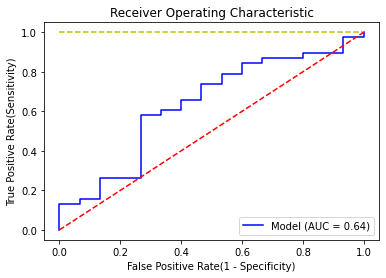

In [27]:
# ROC Curve 작성
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()